In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(16,activation = 'relu'),
    Dense(16,activation = 'relu'),
    Dense(16,activation = 'softmax')
])


In [4]:
# Print the model summary

model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.05148299,  0.07173456, -0.04852287, ..., -0.01182786,
         -0.00572202, -0.05998391],
        [ 0.04463352,  0.06344453,  0.07009083, ...,  0.00454658,
         -0.07725326,  0.03145711],
        [-0.04884576, -0.00523999, -0.02408392, ...,  0.04757808,
          0.02395219, -0.01325447],
        ...,
        [ 0.0470784 , -0.07011524,  0.0023764 , ...,  0.05207077,
         -0.04050727,  0.01678481],
        [ 0.03942758,  0.06451006,  0.07236236, ..., -0.01166111,
         -0.04253419, -0.01403322],
        [-0.05132503, -0.01717544, -0.07755277, ..., -0.06276274,
          0.03122877,  0.03105374]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 0.3635476 , -0.2181211 ,  0.40482298,  0.3546925

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
Total params: 13,104
Trainable params: 13,104
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation = 'softmax')
])

In [8]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [9]:
# Define the model optimizer, loss function and metrics

model.compile(
    optimizer = 'sgd',
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy','mae'])

In [10]:
# Other way to define
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(
    optimizer = opt,
    loss      = 'sparse_categorical_crossentropy',
    metrics   = [acc,mae])

In [11]:
# Print the resulting model attributes

print(model.optimizer)
print(model.loss)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f66b822aef0>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f66b822a048>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [12]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [13]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [15]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [16]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

label: T-shirt/top


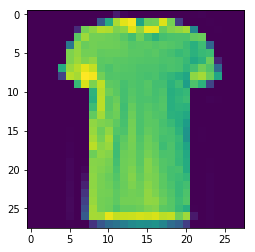

In [17]:
# Display some of the images

import time
from IPython.display import clear_output

for i in range(10,18):
    
    img = train_images[i,:,:]
    plt.imshow(img)
        
    clear_output(wait= True)
    print(f'label: {labels[train_labels[i]]}')
    plt.show()
    time.sleep(0.5)

#### Fit the model

In [18]:
# Fit the model

history = model.fit(train_images[...,np.newaxis],train_labels, epochs = 3, batch_size = 256)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.5687 - sparse_categorical_accuracy: 0.7993 - mean_absolute_error: 4.4200
Epoch 2/3
60000/60000 [==============================] - 54s 893us/sample - loss: 0.3694 - sparse_categorical_accuracy: 0.8673 - mean_absolute_error: 4.4200
Epoch 3/3
60000/60000 [==============================] - 51s 850us/sample - loss: 0.3383 - sparse_categorical_accuracy: 0.8783 - mean_absolute_error: 4.4200


#### Plot training history

In [19]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.568667,0.799333,4.420000
1,0.369378,0.867283,4.419999
2,0.338288,0.878300,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

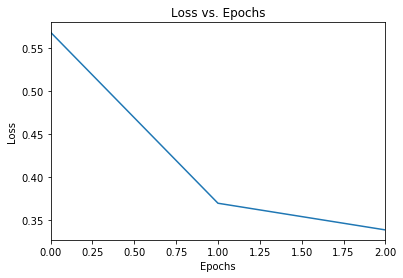

In [20]:
# Make a plot for the loss

loss_plot = df.plot(y = 'loss', title = 'Loss vs. Epochs', legend = False)
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')

[Text(0, 0.5, 'Sparse categorical accuracy'), Text(0.5, 0, 'Epochs')]

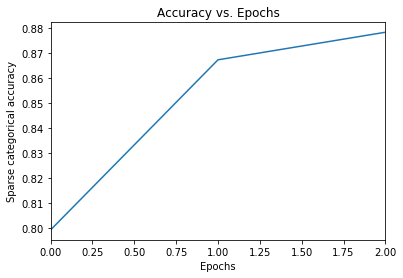

In [21]:
# Make a plot for the accuracy

acc_plot = df.plot(y = 'sparse_categorical_accuracy', title = 'Accuracy vs. Epochs', legend = False)
acc_plot.set(xlabel = 'Epochs', ylabel = 'Sparse categorical accuracy')

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

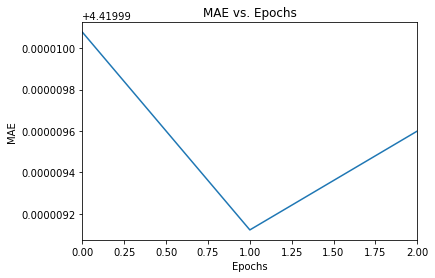

In [22]:
# Make a plot for the additional metric

acc_plot = df.plot(y = 'mean_absolute_error', title = 'MAE vs. Epochs', legend = False)
acc_plot.set(xlabel = 'Epochs', ylabel = 'MAE')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [29]:
# Evaluate the model

model.evaluate(test_images[..., np.newaxis], test_labels, verbose = 2)

10000/1 - 7s - loss: 0.2585 - sparse_categorical_accuracy: 0.8638 - mean_absolute_error: 4.4200


[0.37425863778591156, 0.8638, 4.419997]

#### Make predictions from the model

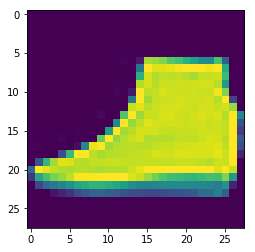

Label: Ankle boot


In [72]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [73]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f'Model prediction: {labels[np.argmax(predictions)]}')

Model prediction: Ankle boot


In [74]:
pd.concat([pd.Series(labels), pd.Series(predictions[0]).round(4)],axis = 1)

,0,1
0,T-shirt/top,0.0000
1,Trouser,0.0000
2,Pullover,0.0000
3,Dress,0.0000
4,Coat,0.0000
5,Sandal,0.0017
6,Shirt,0.0000
7,Sneaker,0.0163
8,Bag,0.0001
9,Ankle boot,0.9819
